# Task 1

The task consists on building a 4 qubit quantum circuit formed by $L$ layers of even and odd blocks of parametrized gates. Odd blocks are $R_x$ gates each with a parameter $\theta_{i,n} \in (0,2 \pi)$, where $i \in 1,2,3,4$ and even blocks are  $R_z$ gates with $\theta_{i,n}$ parameters followed by $c_z$ gates between each pair of qubits. 
We are going to try to minimize the distance between the initial state ($|\phi>$)and the evolved state varying the parameters $\theta_{i,n}$:
$\epsilon = \text{min}_{\theta}|| |\psi(\theta)>-|\phi>||$ 

We are also going to investigate the behavior of varying L

In [389]:
import numpy as np
import scipy
from qiskit import *
import matplotlib.pyplot as plt

In [232]:
from qiskit.quantum_info import random_statevector
from scipy.optimize import minimize

In [345]:
#Creates even block: Rz gates and Cz gates
def even_block(tht):
    qc=QuantumCircuit(4, name='even_block')
    #Rz gates on all qubits
    for i in range(0,len(tht)):
        qc.rz(tht[i],i)
    #Cz gates on all possible combinations of qubits, following specific order
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    return qc

#Creates odd block: Rx gates 
def odd_block(tht:
    qc=QuantumCircuit(4, name='odd_block')
    #Rx gates on all qubits
    for i in range(0,len(tht)):
        qc.rx(tht[i],i)
    return qc
              
#Creates circuit with nn layers
def circuit(tht):
    nn = len(tht)
    #First layer
    qc = even_block(tht[0])
    qc = qc.combine(odd_block(tht[0]))
    for i in range(1,nn):#Adds layers
        thti=tht[i]
        qc = qc.combine(even_block(thti))
        qc = qc.combine(odd_block(thti))
    return qc
              
#Evolves the state vector and calculates the norm of the substraction between the state vector and its evolution        
def oper(sv,tht):
    tht = tht.tolist()
    thtbeta = []
    if len(tht)==4: #Quick workaround to use lists after optimize function converts to numpy array
        thtbeta.append(tht)
    else:
        jj = 1
        for ii in tht:
            if jj == 1:
                thtalpha = []
                thtalpha.append(ii)
                jj+=1
            elif jj == 5:
                jj=1
                thtbeta.append(thtalpha)
            else:
                thtalpha.append(ii)
                jj+=1
        
    tht = thtbeta
    ev = sv.evolve(circuit(tht)) #psi 
    subs = sv-ev
    res = np.linalg.norm(subs.data)#norm of the difference psi -phi
    return res
              
#Initial random parameters theta according to number of layers nn
def get_tht(nn):
    tht = []
    for i in range(0,nn):
        tht1 = np.random.rand(4)*2*np.pi
        tht1.tolist()
        tht.append(tht1)
    return tht
              
#Bounds for the optimization, 0-2pi             
def get_bounds(nn):
    bnd = np.zeros([nn*4,2])
    for ii in range(0,nn*4):
        bnd[ii,1] = 2*np.pi
    return bnd
        
def opti_vec(sv,nn): #Optimization routine to minimize the norm of sv-ev
    tht0 = get_tht(nn) #Calls get_tht that generates a random set of layers with values 0.0<theta<2pi
    fun = lambda thta: oper(sv,thta) #function to be minimzed, calls oper that calculates the norm of sv-ev
    res = minimize(fun,np.array(tht0),method='SLSQP',bounds=get_bounds(nn),options = {"maxiter":2000}) #Minimizng the oper function with SLSQP method
    return res

In [363]:
L = 1 #number of layers

In [350]:
sv = random_statevector(16)#randomly generated vector on 4 qubits, phi

In [387]:
epsilon = []
for L in range(1,10):
    print(L)
    res = opti_vec(sv,L)
    epsilon.append(res["fun"])
    

1
[array([3.54400398, 5.4839063 , 3.52471   , 1.8491906 ])]
2
[array([4.44386016, 5.85708501, 5.44199971, 1.12534941]), array([4.15091784, 4.62406667, 4.63784202, 3.79392573])]
3
[array([0.45072346, 3.48396429, 3.97165209, 5.8392709 ]), array([4.95729782, 4.71855476, 3.13879553, 3.62960358]), array([3.63469313, 1.98658706, 4.42270903, 1.10555637])]
4
[array([1.08759838, 2.28086907, 1.88476773, 2.51656301]), array([0.41794944, 1.34302877, 2.73191484, 0.12887565]), array([2.29376781, 1.78474512, 4.60312616, 3.38516572]), array([0.68072499, 4.3108452 , 5.046746  , 3.45261422])]
5
[array([3.83123899, 3.72070639, 1.53313408, 0.4153362 ]), array([5.1522125 , 4.04548132, 4.30421374, 5.85655562]), array([4.84173995, 4.65183245, 1.32105755, 5.72924336]), array([1.8294072 , 1.63115153, 3.56764072, 5.18382948]), array([1.57692906, 2.5066134 , 0.19103154, 3.22490331])]
6
[array([0.82968931, 3.58525545, 1.16277433, 5.60851786]), array([5.00280914, 4.52012374, 4.26949674, 2.79367597]), array([1.0877

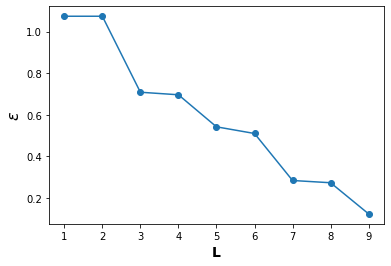

In [393]:
plt.plot(np.arange(1,10), epsilon, marker='o')
plt.xlabel('L', fontsize=14,fontweight='bold')
plt.ylabel('$\epsilon$',fontsize=16,fontweight='bold')
plt.show()

We can see clearly that the minimum distance decreases as the number of layers L increases